> + # 北京地铁数据处理及路径探寻

In [144]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [145]:
import requests
import re

In [146]:
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')
print('文本编码：',r.encoding)
print('相应状态码：',r.status_code)
print('字符串方式响应体：',r.text)

文本编码： utf-8
相应状态码： 200
字符串方式响应体： {"s":"北京市地铁","i":"1100","l":[{"st":[{"rs":"270 684|270 684","udpx":"270 687;270 681","su":"1","udsu":"1;1","n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620","udli":"900000069872;900000069871","poiid":"BV10813545","lg":"0","sp":"jin an qiao"},{"rs":"226 684","udpx":"226 681;226 687","su":"1","udsu":"1;1","n":"四道桥","sid":"900000069871003","p":"226 684","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030","udli":"900000069871;900000069872","poiid":"BV10813547","lg":"0","sp":"si dao qiao"},{"rs":"181 684","udpx":"180 681;180 687","su":"1","udsu":"1;1","n":"桥户营","sid":"900000069871004","p":"181 684","r":"900000069871","udsi":"900000069871004;900000069872013","t":"0","si":"900000069871004","sl":"116.125809,39.912383","udli":"900000069871;900000069872","poiid":"BV1081

In [158]:
#使用json解析
import json
import pandas as pd
bj_s = json.loads(r.text)
bjs = pd.DataFrame(bj_s)
bjs.head()

,s,i,l,o
0,北京市地铁,1100,"{'st': [{'rs': '270 684|270 684', 'udpx': '270...","1015,660"
1,北京市地铁,1100,"{'st': [{'rs': '312 684', 'udpx': '310 685;314...","1015,660"
2,北京市地铁,1100,"{'st': [{'rs': '905 555', 'udpx': '905 558,905...","1015,660"
3,北京市地铁,1100,"{'st': [{'rs': '878 1353', 'udpx': '876 1353;8...","1015,660"
4,北京市地铁,1100,"{'st': [{'rs': '1116 935|1116 935|1116 935', '...","1015,660"


In [159]:
#获取地铁线路信息
#获取站点名称n
#获取经纬度信息sl
pattern_kn = r'"kn":"(\w+)"|"n":"(\w+)"'
pattern_n = r'"n":"(\w+)"'
pattern_sl = r'"sl":"(\d+\.\d+,\d+\.\d+)"'
line = re.findall(pattern_kn,r.text)
#print(line)
name = re.findall(pattern_n,r.text)
#print(name)
location = re.findall(pattern_sl,r.text)
#print(location)

In [266]:
#构建站点名称和经纬度的字典
station_info = {}
for i in range(len(name)):
    station_info[name[i]] = tuple(map(float,location[i].split(',')))
#print(station_info.values())
station_df = pd.DataFrame(station_info)
station_df2 = pd.DataFrame(station_df.values.T,index = station_df.columns,columns = station_df.index)
print(station_df2.head)
line_info = {}
li = list()
for j in line:
    if j[0] =='':
        li.append(j[1])
    else:
        line_info[j[0]] = li
        li = list()
print(line_info)

<bound method NDFrame.head of                 0          1
金安桥    116.163167  39.923620
四道桥    116.134010  39.916030
桥户营    116.125809  39.912383
上岸     116.122225  39.905138
栗园庄    116.123254  39.895780
...           ...        ...
同济南路   116.539901  39.772962
经海路    116.562321  39.783673
次渠南    116.581357  39.795118
次渠     116.591502  39.803500
亦庄火车站  116.601913  39.812607

[340 rows x 2 columns]>
{'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'], '地铁1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '地铁2号线': ['积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门'], '地铁4号线大兴线': ['天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '宣武门', '西单', '灵境胡同', '西四', '平安里', '新街口', '西直门', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '

In [277]:
#建立邻接链表dic
line_list = list(line_info)
#print(line_list)
already_check = list() 
connection = {}
for g in line_list:
    for h in range(len(line_info[g])):
        if line_info[g][h] not in already_check:
            if 0<h<len(line_info[g])-1:
                connection[line_info[g][h]] = [line_info[g][h-1],line_info[g][h+1]]
            if h == 0:
                connection[line_info[g][h]] = [line_info[g][h+1]]
            if h == len(line_info[g])-1:
                connection[line_info[g][h]] = [line_info[g][h-1]]
            already_check.append(line_info[g][h])
        else:
            if 0<h<len(line_info[g])-1:
                connection[line_info[g][h]] += [line_info[g][h-1],line_info[g][h+1]]
            if h == 0:
                connection[line_info[g][h]].append(line_info[g][h+1])
            if h == len(line_info[g])-1:
                connection[line_info[g][h]].append(line_info[g][h-1])

print(connection['宋家庄'])

['刘家窑', '成寿寺', '石榴庄', '肖村']


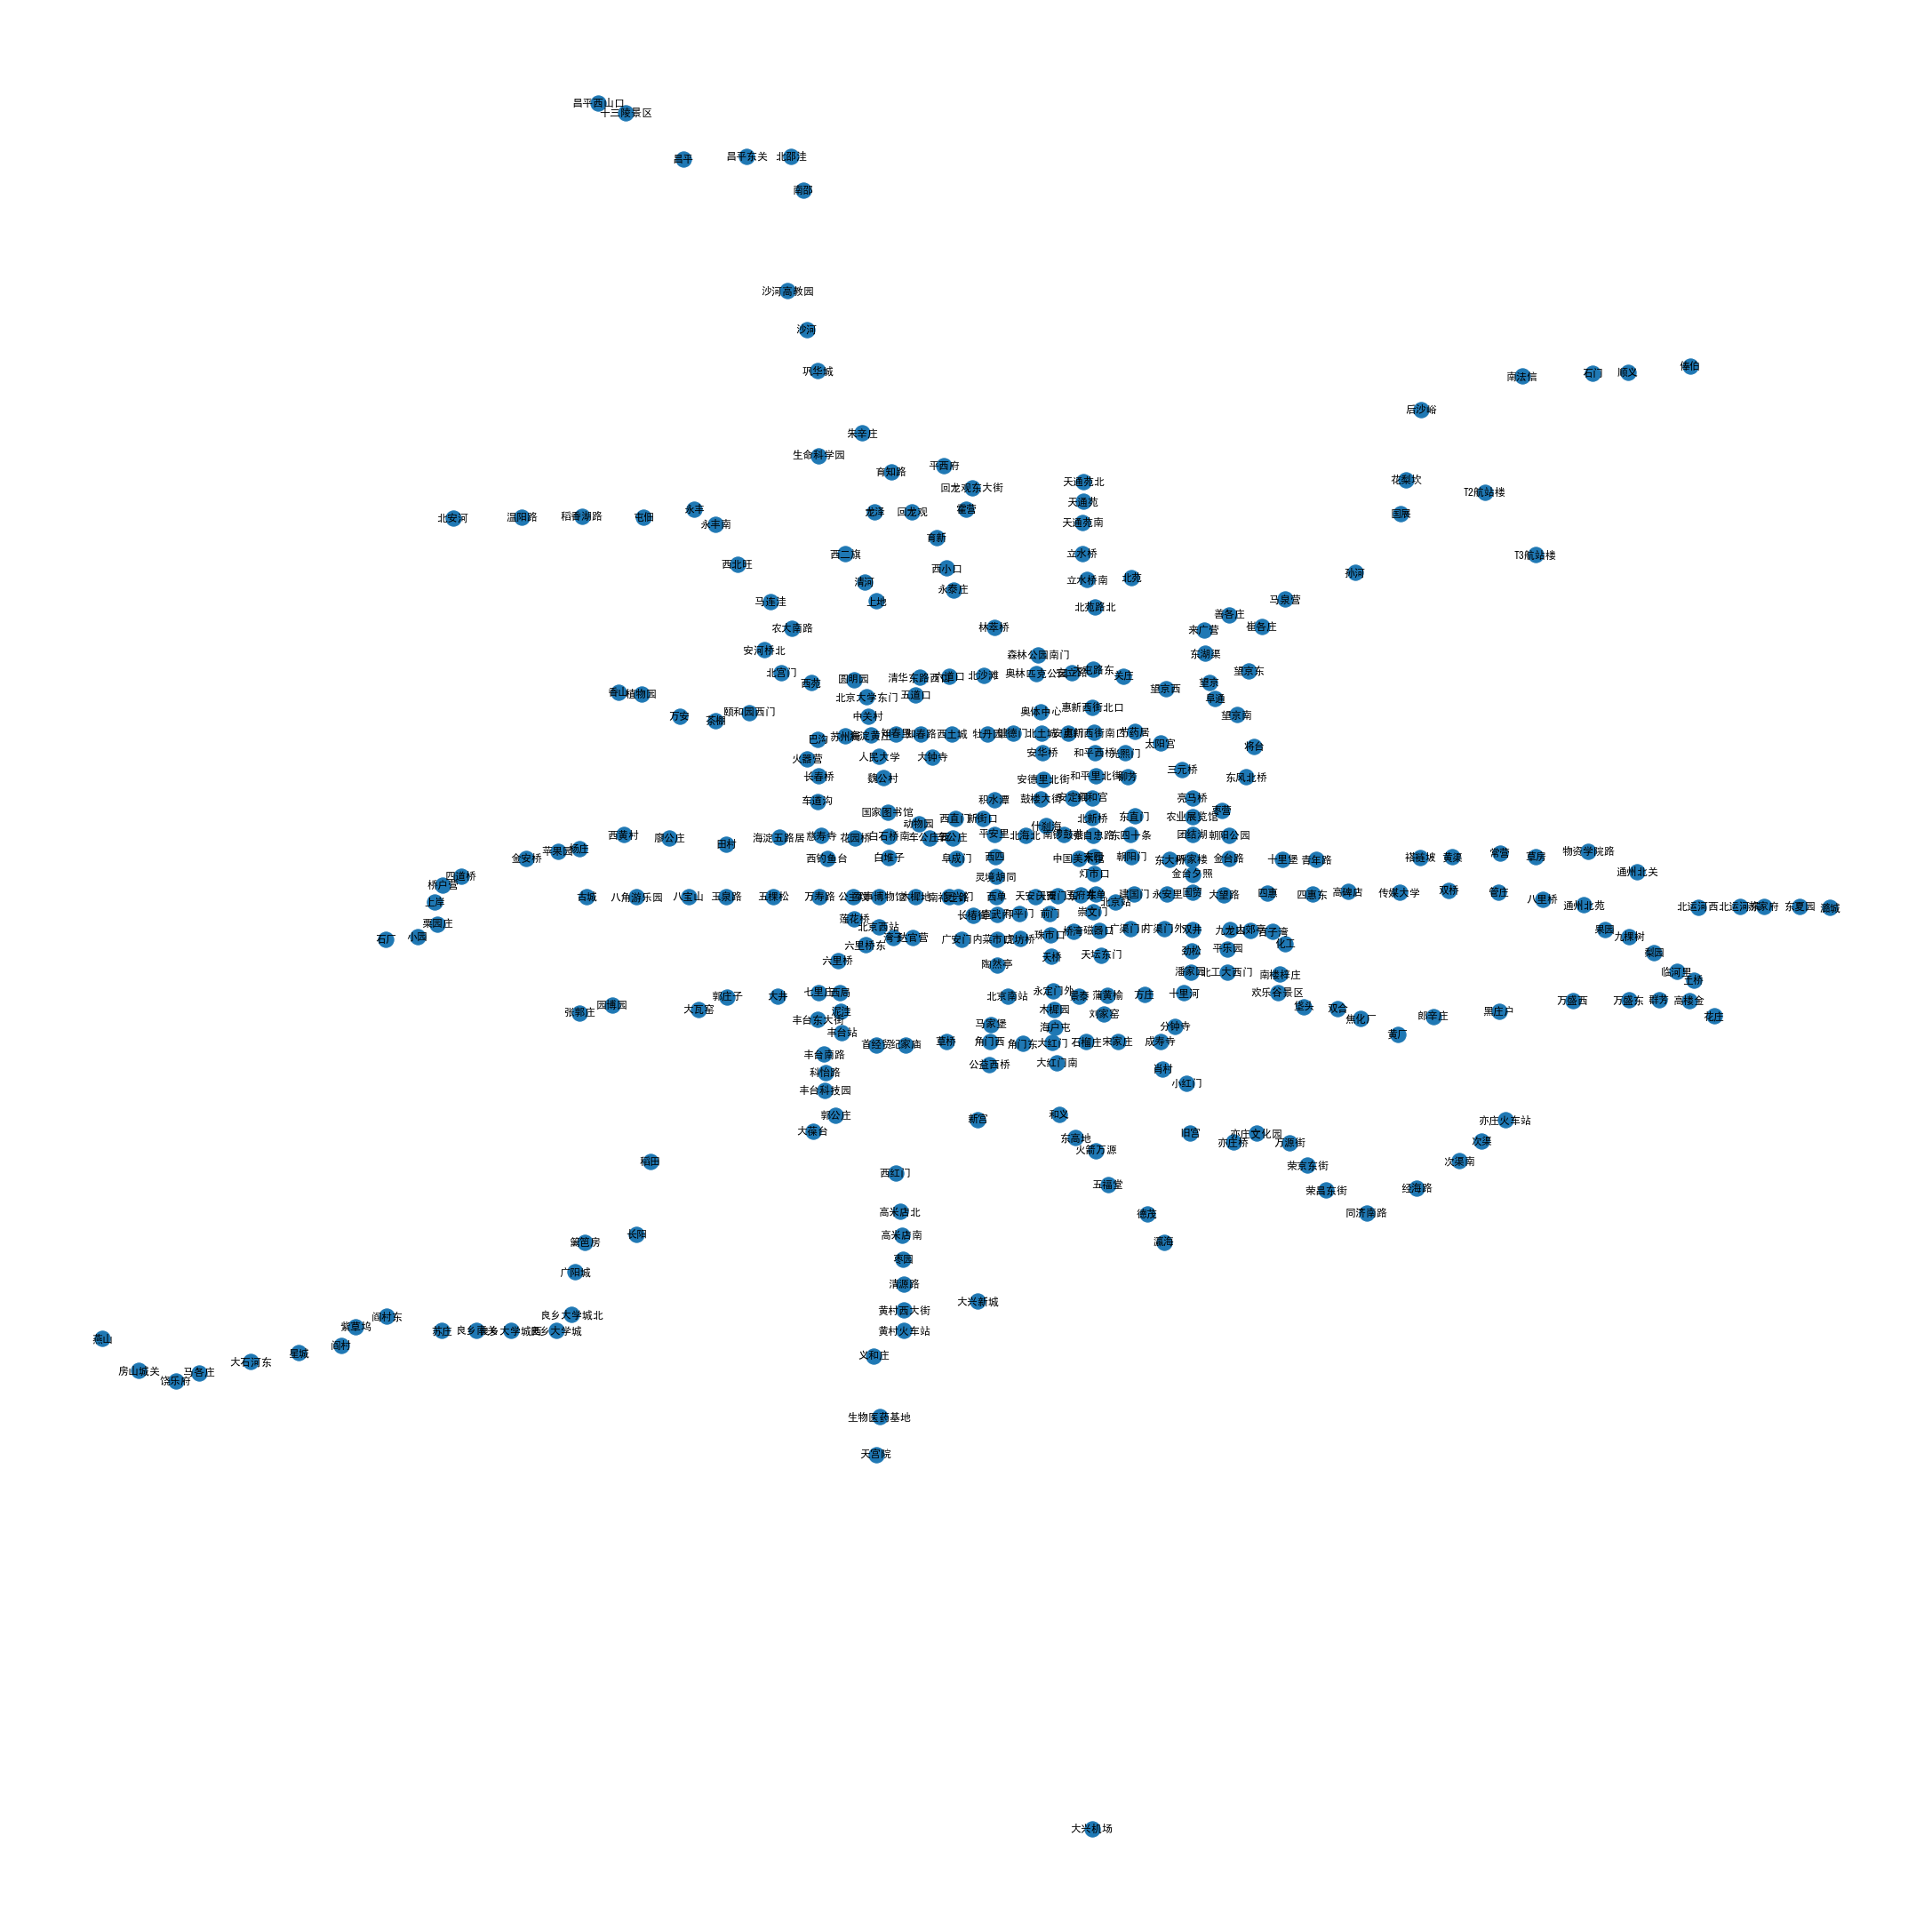

In [261]:
import networkx as nx
import matplotlib.pyplot as plt
from pylab import mpl
plt.rcParams['font.sans-serif'] = ['SimHei']                          # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  
plt.figure(figsize=(30,30))
station_info.keys()
#print(station_info.keys())
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_info.keys()))
nx.draw(station_graph,station_info,with_labels=True,nodes_size=30)

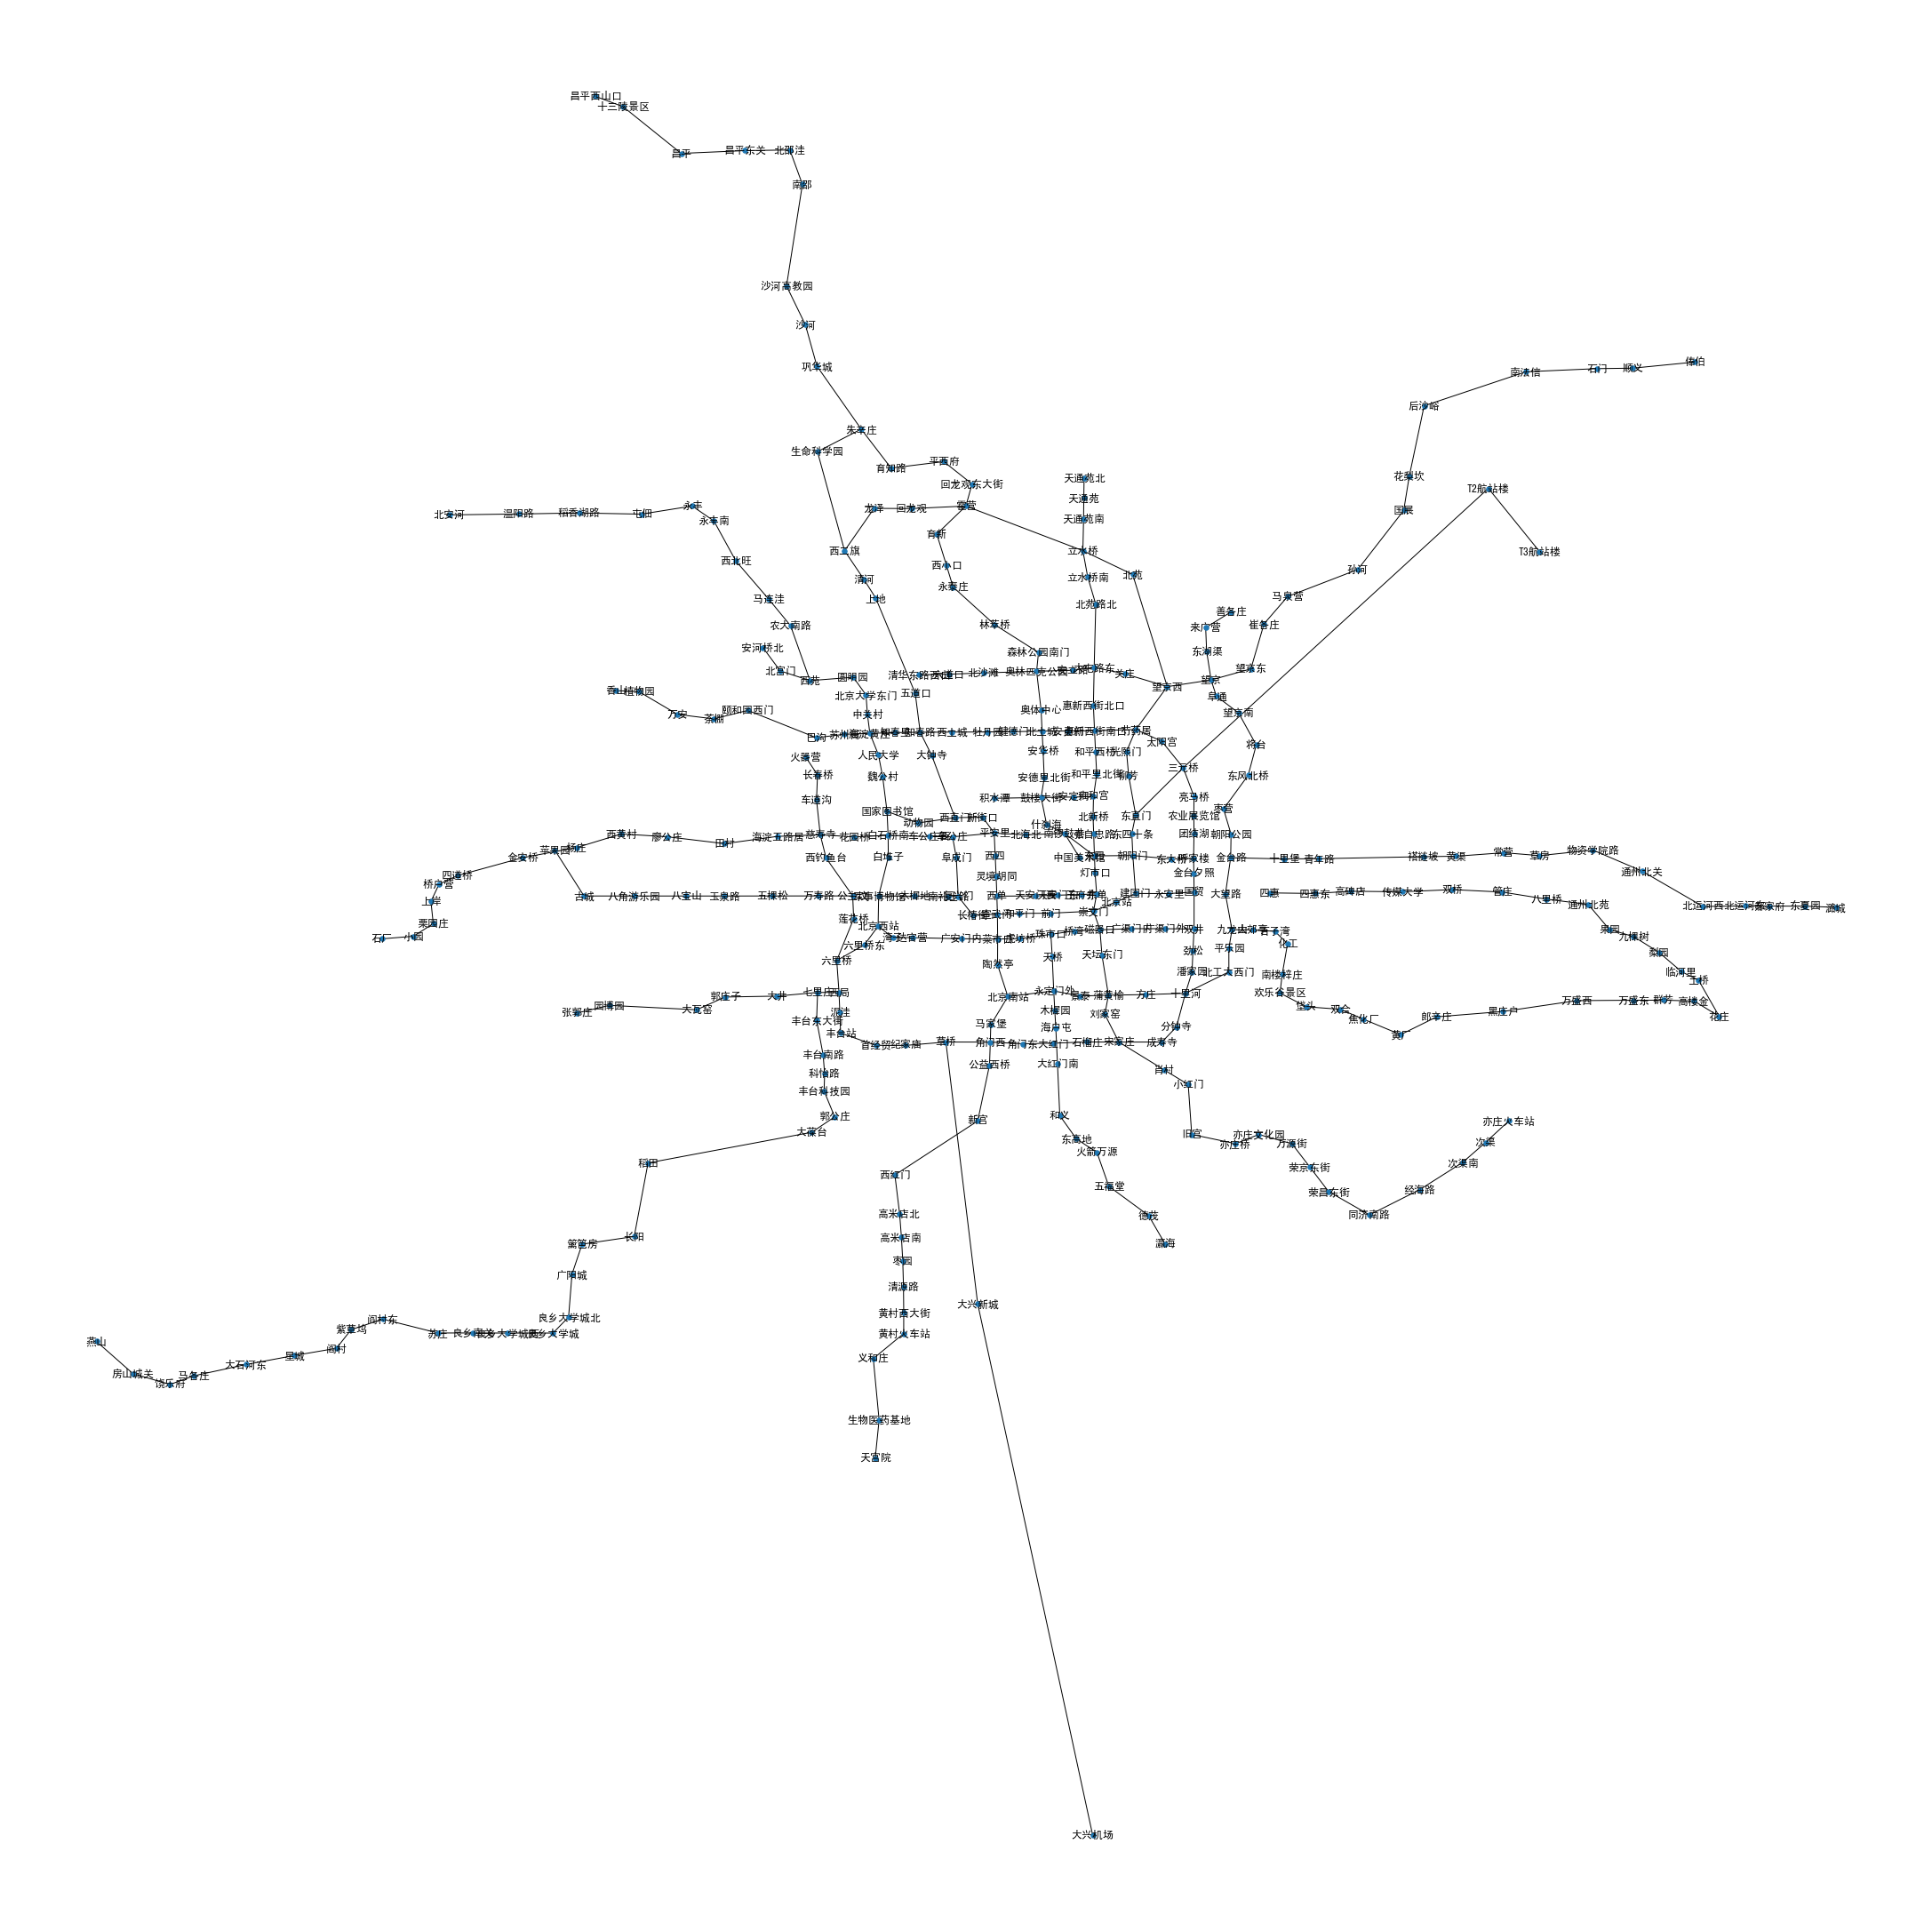

In [256]:
plt.figure(figsize=(30,30))
station_network = nx.Graph(connection)
nx.draw(station_network,station_info,with_labels=True,node_size=30)

In [370]:
#定义距离函数
def search_path (graph,start,destination):
    
    already_check = []#存放检查过的点
    dic = {}#存放检查过的node的prestation
    expand = [start]#存放需要检查的点
    if start not in graph:
        print(0)
        return 
    if destination not in graph:
        return 
    if graph[start] == []:
        print(1)
        return 
    while expand:
        node = expand.pop(0)
        
        if node == destination: 
            return path(start,destination,dic,the_path=[])
            
        
        if node in already_check:continue
        else:
            neighbor = []
            already_check.append(node)
            neighbor = graph[node]
            for i in neighbor:
                if i in already_check: continue
                dic[i] = node
            #print(dic)
            expand += neighbor
            continue
        
def path (initial,value,dic,the_path=[]):
    if value == initial:
        the_path.append(initial)
        return the_path
    value1 = dic[value]
    the_path.append(value)
    return path(initial,value1,dic,the_path)

list = []
list = search_path(connection,'天宫院','宋家庄')
list.reverse()
print(list)

# path('大兴机场','宋家庄',dic,the_path=[])

['天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '角门东', '大红门', '石榴庄', '宋家庄']


In [ ]:
1""" 
2graph 使用字典实现 { 顶点：连接顶点列表} 
3键key是图中顶点 
4值value是与顶点相连接的顶点组成的队列 
5""" 
6class Graph(): 
7    def __init__(self): 
8        self.graph = {} 
9
10    def add_edge(self,from_point,to_point):
11        if from_point in self.graph.keys():
12            self.graph[from_point].append(to_point)
13        else:
14             self.graph[from_point] = [to_point]
15
16# 深度优先搜索算法
17# path存储已访问顶点顺序 
18def dfs_search(graph,start,path = []):  
19    # 顶点不再图中、顶点没有连接顶点，返回空
20    if start not in graph:
21        return path
22    if graph[start] is None:
23        return path
24    if graph[start] == []:
25        return path
26    # 加入已访问顶点
27    path += [start]
28    # 遍历邻接顶点
29    for node in graph[start]:
30        # 顶点没有访问过，则访问
31        if node not in path:
32            path = dfs_search(graph,node,path)
33    return path